# Data Analysis with Python-Project

**Predicting House price**

We are here to analyse the data for Housing price prediction. We will work on better fit of the model, evaluation and interpratation

<h2>Table of content</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
    <li><a>Linear Regression</a>
        <ul>
            <li><a>Importing Dataset</a></li>
            <li><a>Data Wrangling</a></li>
            <li><a>Exploratory Data Analysis</a></li>
            <li><a>Model Development</a></li>
            <li><a>Model Evaluation and Refinement</a></li>
            <li><a>Conclusion</a></li>
        </ul>
    </li>
</ul>
</div>
 
<hr>

### Linear Regression

Linear regression models are used to show or predict the relationship between two variables or factors. The factor(y) that is being predicted  is called the dependent variable, based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output). Hence, the name is Linear Regression. If we plot the independent variable(s), x on the x-axis and dependent variable, y on the y-axis, linear regression gives us a straight line that best fits the data points.

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

<b>id</b> :a notation for a house

<b> date</b>: Date house was sold

<b>price</b>: Price is prediction target

<b>bedrooms</b>: Number of Bedrooms/House

<b>bathrooms</b>: Number of bathrooms/bedrooms

<b>sqft_living</b>: square footage of the home

<b>sqft_lot</b>: square footage of the lot

<b>floors</b> :Total floors (levels) in house

<b>waterfront</b> :House which has a view to a waterfront

<b>view</b>: Has been viewed

<b>condition</b> :How good the condition is  Overall

<b>grade</b>: overall grade given to the housing unit, based on King County grading system


<b>sqft_above</b> :square footage of house apart from basement


<b>sqft_basement</b>: square footage of the basement

<b>yr_built</b> :Built Year


<b>yr_renovated</b> :Year when house was renovated

<b>zipcode</b>:zip code


<b>lat</b>: Latitude coordinate

<b>long</b>: Longitude coordinate

<b>sqft_living15</b> :Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area


<b>sqft_lot15</b> :lotSize area in 2015(implies-- some renovations)

Now, we will anlayse the data step by step starting from the first step of understanding data.

#### Required Libraries

In [252]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import date

### 1. Importing the Data 

In [153]:
data = pd.read_csv('C:/Users/hp/Downloads/house_data.csv')
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7.129301e+09,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,...,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,6.414100e+09,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,...,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,5.631500e+09,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,...,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,2.487201e+09,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,...,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,1.954401e+09,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,...,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0
5,7.237550e+09,20140512T000000,1225000.0,4.0,4.50,5420.0,101930.0,1.0,0.0,0.0,...,11.0,3890.0,1530.0,2001.0,0.0,98053.0,47.6561,-122.005,4760.0,101930.0
6,1.321400e+09,20140627T000000,257500.0,3.0,2.25,1715.0,6819.0,2.0,0.0,0.0,...,7.0,1715.0,0.0,1995.0,0.0,98003.0,47.3097,-122.327,2238.0,6819.0
7,2.008000e+09,20150115T000000,291850.0,3.0,1.50,1060.0,9711.0,1.0,0.0,0.0,...,7.0,1060.0,0.0,1963.0,0.0,98198.0,47.4095,-122.315,1650.0,9711.0
8,2.414600e+09,20150415T000000,229500.0,3.0,1.00,1780.0,7470.0,1.0,0.0,0.0,...,7.0,1050.0,730.0,1960.0,0.0,98146.0,47.5123,-122.337,1780.0,8113.0
9,3.793500e+09,20150312T000000,323000.0,3.0,2.50,1890.0,6560.0,2.0,0.0,0.0,...,7.0,1890.0,0.0,2003.0,0.0,98038.0,47.3684,-122.031,2390.0,7570.0


Displaying data types of each column using the attribute dtype

In [154]:
data.dtypes

id               float64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition        float64
grade            float64
sqft_above       float64
sqft_basement    float64
yr_built         float64
yr_renovated     float64
zipcode          float64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
dtype: object

We see that all variables are float type except time.

**Statistical Summary:**

In [155]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402029e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.671337e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Here, we have mean, count, standard deviations, quartiles and extreme values for each value.
Let's have a look at shape of dataset.

In [156]:
data.shape

(21613, 21)

So far, we understood about variables and structure of data.

Moving forward for making data qualitatively ready from trainig models.

### 2. Data Wrangling

In [157]:
data=data.drop(['id'], axis=1)
data['date']=pd.to_datetime(data['date'])
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,2014-12-09,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,2015-02-25,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,2014-12-09,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,2015-02-18,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0


In [158]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,2014-12-09,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,2015-02-25,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,2014-12-09,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,2015-02-18,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0


In [159]:
data.isnull().sum()

date             16
price            16
bedrooms         16
bathrooms        16
sqft_living      16
sqft_lot         16
floors           16
waterfront       16
view             16
condition        16
grade            16
sqft_above       16
sqft_basement    16
yr_built         16
yr_renovated     16
zipcode          16
lat              16
long             16
sqft_living15    16
sqft_lot15       16
dtype: int64

Here, we can either fill missing values with mean of available values in the respective variable, or we can remove them from the data frame if we number of missing values is sugnificantly small as compared to the number of observations.

We chose to remove the missing values from the dataset.

In [160]:
data=data.dropna()
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [161]:
data.shape

(21597, 20)

16 rows have been dropped out for making the data clean and qualitative.

### 3. Exploratory data analysis

####  Using the function <code>boxplot</code> in the seaborn library  to  determine whether houses with a waterfront view or without a waterfront view have more price outliers .


In [162]:
floors=data['floors'].value_counts()
print(floors)

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64


In [163]:
waterfront=data['waterfront'].value_counts()
print(waterfront)

0.0    21434
1.0      163
Name: waterfront, dtype: int64


In [164]:
view=data['view'].value_counts()
print(view)

0.0    19475
2.0      961
3.0      510
1.0      332
4.0      319
Name: view, dtype: int64


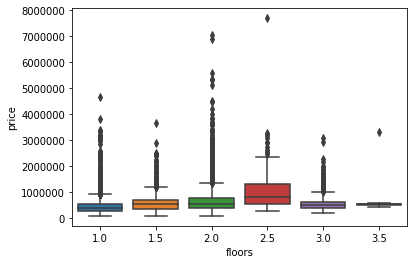

In [165]:
sns.boxplot(data['floors'],data['price'])

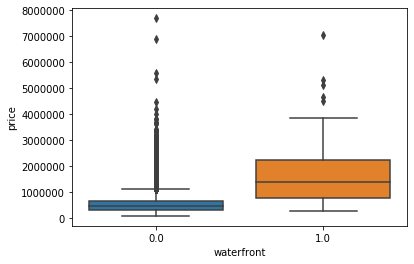

In [166]:
sns.boxplot(data['waterfront'],data['price'])

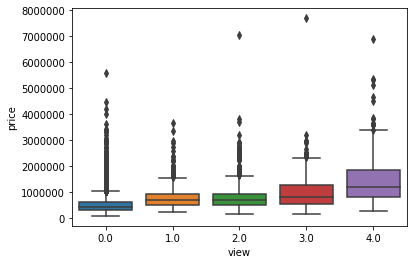

In [167]:
sns.boxplot(data['view'], data['price'])

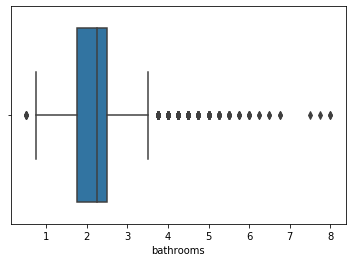

In [168]:
sns.boxplot(data['bathrooms'])

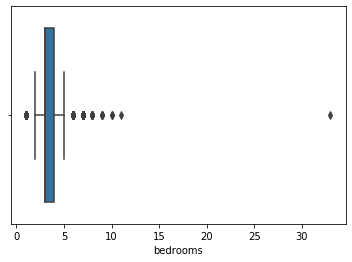

In [169]:
sns.boxplot(data['bedrooms'])

#### Using the function <code> regplot</code>  in the seaborn library  to  determine if the feature <code>sqft_above</code> is negatively or positively correlated with price.

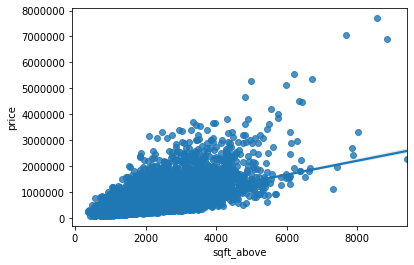

In [170]:
sns.regplot(data['sqft_above'], data['price'])

A positive correlation is being observed.

We can use the Pandas method **corr()** to find the correlation with price.

In [171]:
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308794,0.525905,0.701909,0.089882,0.256814,0.266437,0.397318,0.036025,0.667922,0.605371,0.323776,0.053984,0.126415,-0.053437,0.306777,0.022092,0.585247,0.082837
bedrooms,0.308794,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.525905,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,0.701909,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,0.089882,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.256814,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,0.266437,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781
view,0.397318,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904
condition,0.036025,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126
grade,0.667922,0.356563,0.665838,0.762779,0.114731,0.458794,0.082888,0.251728,-0.146896,1.000000,0.756073,0.168220,0.447865,0.014261,-0.185771,0.113575,0.200341,0.713867,0.120981


In [172]:
data.corr()['price']

price            1.000000
bedrooms         0.308794
bathrooms        0.525905
sqft_living      0.701909
sqft_lot         0.089882
floors           0.256814
waterfront       0.266437
view             0.397318
condition        0.036025
grade            0.667922
sqft_above       0.605371
sqft_basement    0.323776
yr_built         0.053984
yr_renovated     0.126415
zipcode         -0.053437
lat              0.306777
long             0.022092
sqft_living15    0.585247
sqft_lot15       0.082837
Name: price, dtype: float64

**sqft_living, grade, sqft_above** and **sqft_living15** have significant correlation with 'price'

### 4. Model Development

In [263]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lr1= LinearRegression()               # simple linear regression

In [265]:
lr1.fit(data[['long']], data[['price']])
print('R^2:',lr1.score(data[['long']], data[['price']]))

R^2: 0.0004880571908287834


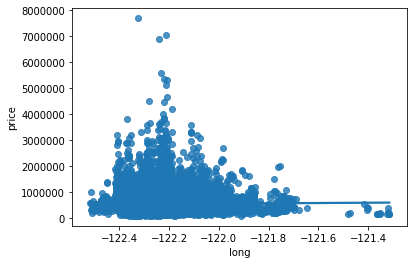

In [174]:
sns.regplot(x=data[['long']], y=data[['price']])

We will fit a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the R^2.

R^2: 0.44622854390569905


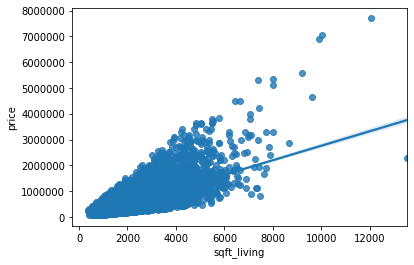

In [261]:
sns.regplot(x=data[['sqft_living']], y=data[['price']])
print('R^2:',lr1.score(data[['sqft_living']], data[['price']]))   #R^2

**grade** vs **price**

R^2: -1.695351263836364


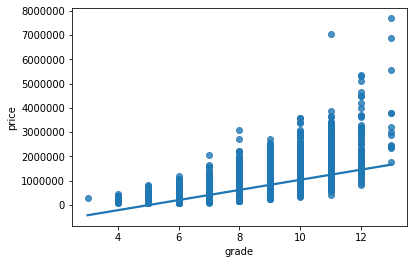

In [260]:
sns.regplot(x=data[['grade']], y=data[['price']])
print('R^2:',lr1.score(data[['grade']], data[['price']]))   #R^2

**sqft_living15** vs **price**

R^2: 0.44622854390569905


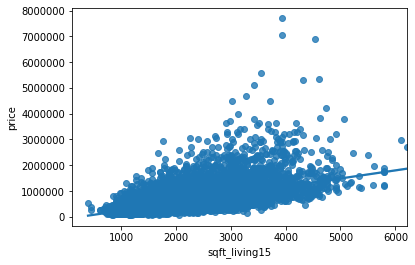

In [259]:
sns.regplot(x=data[['sqft_living15']], y=data[['price']])
print('R^2:',lr1.score(data[['sqft_living']], data[['price']]))   #R^2

**sqft_living** has highest score and hance it will is the best model out of these.

####  Multiple Linear Regression :

In [255]:
x =data[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above",
              "grade","sqft_living"]]
y=data['price']

mlr= LinearRegression()
mlr.fit(x,y)
mlr.intercept_

-32410581.080242626

In [181]:
mlr.coef_

array([-2.88899012e+04,  6.03070370e+05,  6.73342354e+05, -2.61977246e+04,
       -1.54323214e+15,  6.69853285e+04, -3.72225679e+03,  3.43376657e+00,
       -1.54323214e+15,  8.28528599e+04,  1.54323214e+15])

In [182]:
mlr.score(x,y)

0.6578182983974398

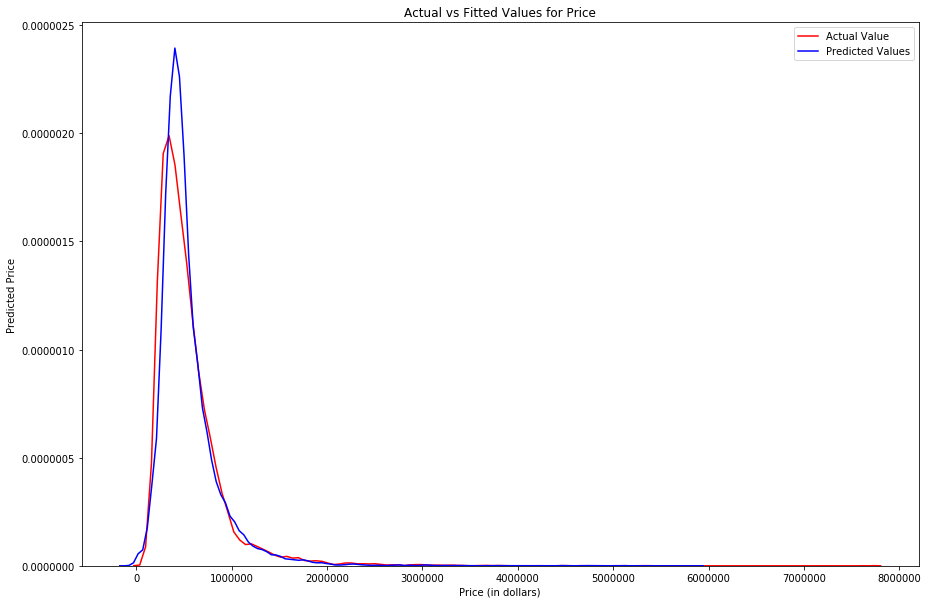

In [183]:
plt.figure(figsize=(15, 10))


ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_hat, hist=False, color="b", label="Predicted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Predicted Price')

plt.show()

The R^2 value is 0.66

#### Using the list to create a pipeline object,  predict the 'price', fit the object using the features in the list <code> x </code>, then fit the model and calculate the R^2

In [184]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [185]:
input= [('scale', StandardScaler()), ('polynomial', PolynomialFeatures()), ('model', LinearRegression())]

In [186]:
pipe= Pipeline(input)

In [187]:
pipe.fit(x,y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [188]:
y_hat= pipe.predict(x)

In [189]:
y_hat[0:5]

array([349593. , 558013.5, 451281. , 392880. , 520870. ])

In [190]:
pipe.score(x,y)

0.7513821699337961

### 5: MODEL EVALUATION AND REFINEMENT


In [191]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

#### Training the model with train data

In [192]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=0)
print( 'train data:', x_train.shape, y_train.shape)
print( 'test data:', x_test.shape, y_test.shape)

train data: (17277, 11) (17277,)
test data: (4320, 11) (4320,)


In [193]:
pipe.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [195]:
y_train_hat= pipe.predict(x_train)
y_train_hat[0:5]

array([1300361.5,  291497.5,  159376. ,  524757.5,  733001.5])

#### Training with test data

In [202]:
y_test_hat=pipe.predict(x_test)
print(y_test[0:5], y_test_hat[0:5])


156      650000.0
15586    625000.0
2082     822500.0
17536    179900.0
8367     370000.0
Name: price, dtype: float64 [938921.5 620923.5 924355.5 163225.5 553849.5]


#### Evaluation

In [203]:
pipe.score(x_train, y_train)

0.7534439881757301

In [205]:
pipe.score(x_test, y_test)

0.738859541680613

There is not a much difference between in-sample and out-sample accuracy score

##### Cross Validation Score Method

In [206]:
from sklearn.model_selection import cross_val_score

The parameter 'cv' determines the number of folds; in this case 4.

In [208]:
Rcross = cross_val_score(pipe, x, y, cv=4)
Rcross

array([0.75276295, 0.73817077, 0.69274109, 0.73399726])

Calculating the average and standard deviation of our estimates:

In [210]:
print("The mean of the folds are", Rcross.mean())
print("Standard deviation is" , Rcross.std())

The mean of the folds are 0.7294180184741832
Standard deviation is 0.022292166303951685


Here, the mean value of accuracy is **73%**, hence model is a **good fit**.

##### Error Metrics

In [246]:
from sklearn import metrics
print('MAE(Mean Absolute Error for train data):', metrics.mean_absolute_error(y_train, y_train_hat))
print('MAE(Mean Absolute Error for test data):', metrics.mean_absolute_error(y_test, y_test_hat))

MAE(Mean Absolute Error for train data): 115520.07096139377
MAE(Mean Absolute Error for test data): 113212.59143518518


In [249]:
print('RMSE(Root Mean Squarred Error for train data):', np.sqrt(metrics.mean_squared_error(y_train, y_train_hat)))
print('RMSE(Root Mean Squarred Error for test data):', np.sqrt(metrics.mean_squared_error(y_test, y_test_hat)))

RMSE(Root Mean Squarred Error for train data): 185183.0714806332
RMSE(Root Mean Squarred Error for test data): 175169.3773600782


We find here that MAE and RMSE in training data and testing data are close enough. Hence, model behaves as a **good fit**.

##### Distrubution Plot method

In [237]:
df_train = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_hat})
df_train.head()

,Actual,Predicted
3934,1379900.0,1300361.5
8274,82000.0,291497.5
15621,220000.0,159376.0
6686,369950.0,524757.5
7006,870000.0,733001.5


In [238]:
df_test = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_hat})
df_test.head()

,Actual,Predicted
156,650000.0,938921.5
15586,625000.0,620923.5
2082,822500.0,924355.5
17536,179900.0,163225.5
8367,370000.0,553849.5


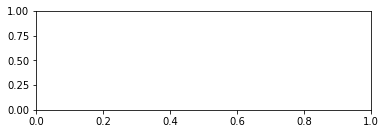

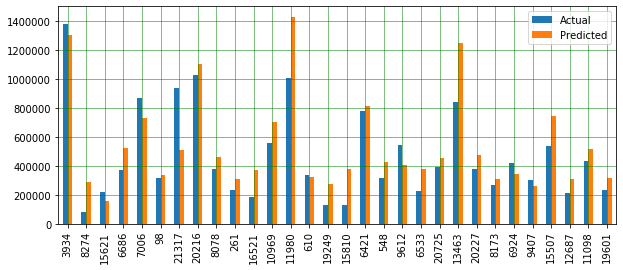

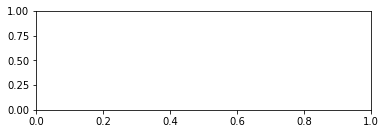

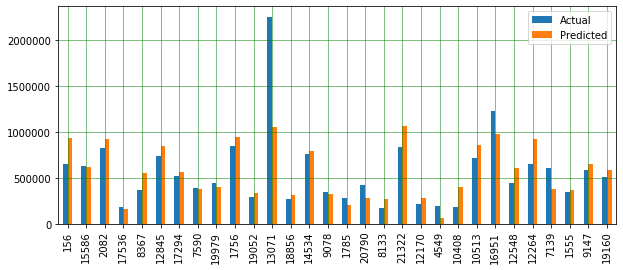

In [245]:
df_tr = df_train.head(30)
df_te = df_test.head(30)

plt.subplot(2,1,1)
df_tr.plot(kind='bar',figsize=(10,4))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='red')
plt.show()

plt.subplot(2,1,2)
df_te.plot(kind='bar',figsize=(10,4))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='red')
plt.show()

Here, we can see that the predicted values are close to the actual ones except 3 values in train-model and 1 value in test-model.

Exploring more with distrubutions of actual vs predicted values.

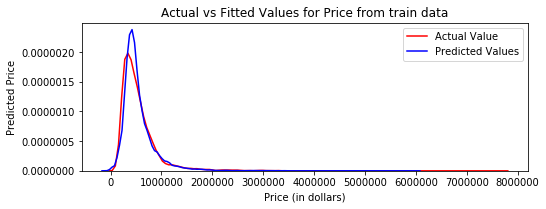

R^2: 0.7534439881757301


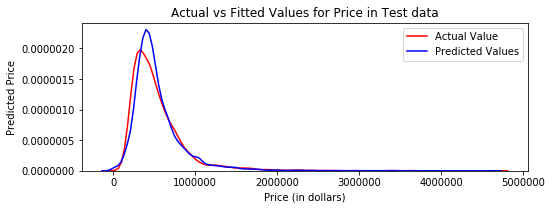

R^2: 0.738859541680613


In [224]:
plt.figure(figsize=(8,6))

plt.subplot(2,1,1)
ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value")
sns.distplot(y_train_hat, hist=False, color="b", label="Predicted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price from train data')
plt.xlabel('Price (in dollars)')
plt.ylabel('Predicted Price')
plt.show()
print('R^2:',pipe.score(x_train, y_train))

plt.figure(figsize=(8,6))
plt.subplot(2,1,2)
ax2 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_test_hat, hist=False, color="b", label="Predicted Values" , ax=ax2)
plt.title('Actual vs Fitted Values for Price in Test data')
plt.xlabel('Price (in dollars)')
plt.ylabel('Predicted Price')
plt.show()
print('R^2:',pipe.score(x_test, y_test))


We notice from the graphical representation that the model is doing well with the train and test data with almost equal efficiency. And, hence again it shows the qualitites of **fit model**.

### 6. Conclusion

**Finally we conclude on the basis of above metrics performances that the model fails to underfitting or overfitting and has a good efficiency in predicting the values out of trained sample.
The model is good fit.**

.








Thanks

Arun Virha